# Titanic Data Exploration

This is the second notebook in my _Titanic Notebooks_ series. Source code is available from [Gitlab](https://gitlab.com/pirivan/dataware/tree/master/pydata/titanic).

Kernels in the series are:

* [Titanic Data Clean Up](https://nbviewer.jupyter.org/urls/gitlab.com/pirivan/dataware/raw/master/pydata/titanic/titanic-1.ipynb)
* [Titanic Data Exploration](https://nbviewer.jupyter.org/urls/gitlab.com/pirivan/dataware/raw/master/pydata/titanic/titanic-2.ipynb)
* [Titanic Machine Learning Models](https://nbviewer.jupyter.org/urls/gitlab.com/pirivan/dataware/raw/master/pydata/titanic/titanic-3.ipynb)

This kernel explores the relevance of the current set of features for the purpose of predicting survival. This is done through data visualization and statistic analysis. Once the analysis is complete the datasets are saved for processing by the data models.

## Table of Contents

* [The Datasets](#the-datasets)
* [Exploring the Categorical Features](#exploring-the-categorical-features)
    * [Mean Survival Rates](#mean-survival-rates)
    * [Categortical Features Heat Map](#categortical-features-heat-map)
* [Exploring The Numerical Features](#numerical-features)
    * [The Age Factor](#the-age-factor)
    * [Age Groups](#age-groups)
    * [The Ticket Fare](#the-ticket-fare)
    * [Age and Fare Together](#age-and-fare)
* [Feature Clean Up](#feature-clean-up)
* [Saving the Data](#saving-the-data)

## <a name="the-datasets"></a>The Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
pd.options.display.max_rows = 10
combined_df = pd.read_csv('data/combined-1.csv', index_col=[0,1])
train_df = pd.read_csv('data/train-1.csv', index_col=0)
train_df

Pclass                                               Name  Gender  Age  \
id                                                                            
1         3                            Braund, Mr. Owen Harris    male   22   
2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38   
3         3                             Heikkinen, Miss. Laina  female   26   
4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35   
5         3                           Allen, Mr. William Henry    male   35   
..      ...                                                ...     ...  ...   
887       2                              Montvila, Rev. Juozas    male   27   
888       1                       Graham, Miss. Margaret Edith  female   19   
889       3           Johnston, Miss. Catherine Helen "Carrie"  female    1   
890       1                              Behr, Mr. Karl Howell    male   26   
891       3                                Dooley, Mr. Patrick    male   32   

     SibSp  Parch     Fare Embarked  Fsize Title  Gender_cat  Embarked_cat  \
id                                                                           
1        1      0   7.2500        S      2    Mr           1             2   
2        1      0  71.2833        C      2   Mrs           0             0   
3        0      0   7.9250        S      1  Miss           0             2   
4        1      0  53.1000        S      2   Mrs           0             2   
5        0      0   8.0500        S      1    Mr           1             2   
..     ...    ...      ...      ...    ...   ...         ...           ...   
887      0      0  13.0000        S      1  Misc           1             2   
888      0      0  30.0000        S      1  Miss           0             2   
889      1      2  23.4500        S      4  Miss           0             2   
890      0      0  30.0000        C      1    Mr           1             0   
891      0      0   7.7500        Q      1    Mr           1             1   

     Title_cat  Survived  
id                        
1            3         0  
2            4         1  
3            2         1  
4            4         1  
5            3         0  
..         ...       ...  
887          1         0  
888          2         1  
889          2         0  
890          3         1  
891          3         0  

[891 rows x 14 columns]

## <a name="exploring-the-categorical-features"></a>Exploring the Categorical Features

Let's start by drawing overall observations from the distributions of the `Gender`, `Pclass`, `Embarked`, and `Title` features in the training dataset.

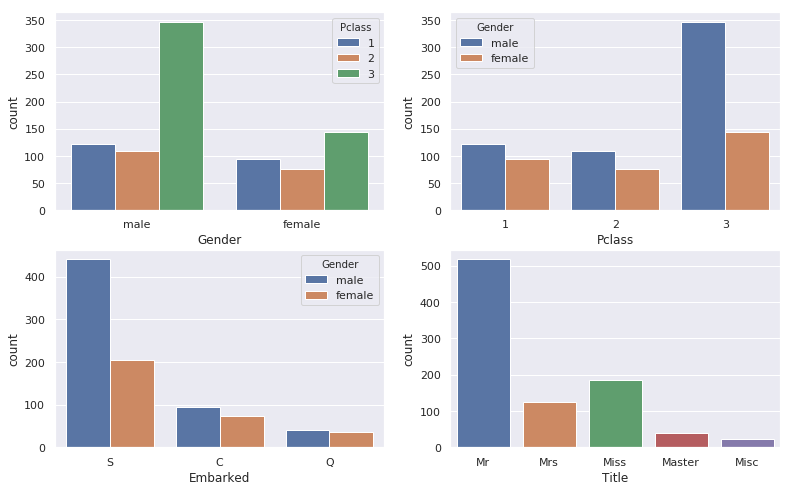

In [3]:
data_df = train_df
_, ax = plt.subplots(2,2,figsize=(13,8))
gender = sns.countplot(data_df.Gender, hue=data_df.Pclass, ax= ax[0][0])
pclass = sns.countplot(data_df.Pclass, hue=data_df.Gender, ax= ax[0][1])
port = sns.countplot(data_df.Embarked, hue=data_df.Gender, ax= ax[1][0])
title = sns.countplot(data_df.Title, ax= ax[1][1])

Observations:

* The majority of passengers in the Titanic were males of class 3 who embarked at port S.
* The majority of females were of class 3 also, and who similarly embarked at port S.
* Judging by the titles, males were mostly adults, with children (_Masters_) accounting by less than 10% of the male population. Single females outnumbered married ones by about 25%.

### <a name="mean-survival-rates"></a>Mean Survival Rates

Let's look now at mean survival rates with the help of two custom functions.

In [4]:
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

def survival_mean(column):
    return (train_df[[column, 'Survived']].groupby(column, as_index=False)
                                          .mean()
                                          .sort_values(['Survived', column],
            ascending=False))

display_side_by_side(survival_mean('Gender'),
                     survival_mean('Pclass'),
                     survival_mean('Embarked'),
                     survival_mean('Title'),
                     survival_mean('Fsize'))

Gender 
 Survived 
 
 
 
 
 0 
 female 
 0.742038 
 
 
 1 
 male 
 0.188908 
 
 
 
 
 
 
 Pclass 
 Survived 
 
 
 
 
 0 
 1 
 0.629630 
 
 
 1 
 2 
 0.472826 
 
 
 2 
 3 
 0.242363 
 
 
 
 
 
 
 Embarked 
 Survived 
 
 
 
 
 0 
 C 
 0.553571 
 
 
 1 
 Q 
 0.389610 
 
 
 2 
 S 
 0.339009 
 
 
 
 
 
 
 Title 
 Survived 
 
 
 
 
 4 
 Mrs 
 0.793651 
 
 
 2 
 Miss 
 0.702703 
 
 
 0 
 Master 
 0.575000 
 
 
 1 
 Misc 
 0.363636 
 
 
 3 
 Mr 
 0.156371 
 
 
 
 
 
 
 Fsize 
 Survived 
 
 
 
 
 3 
 4 
 0.724138 
 
 
 2 
 3 
 0.578431 
 
 
 1 
 2 
 0.552795 
 
 
 6 
 7 
 0.333333 
 
 
 0 
 1 
 0.303538 
 
 
 4 
 5 
 0.200000 
 
 
 5 
 6 
 0.136364 
 
 
 8 
 11 
 0.000000 
 
 
 7 
 8 
 0.000000

Reading along the first line of the combined display above tells us that in general the best survival rates were those of older (Mrs) females of priority class 1 who embarked at the C port and were part of a family of 4. Females had a much higher survival rate than males.

Similarly, reading along the last lines of the dataframes tells us that in general the worst survival rates were those of males (Mr) of priority class 3 who embarked at the S port who were part of a large family. Males had a much lower survival rate than females.

The above statements are based on mean values with mixed stats and therefore provide first-level insigths only. We can improve the analysis by looking at some multi-feature charts. But first, let's calculate a new dataframe organized by categories and listing mean survival rates.

In [5]:
means_df = train_df.groupby(['Gender', 'Pclass', 'Embarked', 'Title', 'Fsize'], as_index=False).mean()
means_df.drop(['Age', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)
means_df

Gender  Pclass Embarked Title  Fsize  Gender_cat  Embarked_cat  \
0    female       1        C  Misc      2         0.0           0.0   
1    female       1        C  Miss      1         0.0           0.0   
2    female       1        C  Miss      2         0.0           0.0   
3    female       1        C  Miss      3         0.0           0.0   
4    female       1        C  Miss      5         0.0           0.0   
..      ...     ...      ...   ...    ...         ...           ...   
117    male       3        S    Mr      5         1.0           2.0   
118    male       3        S    Mr      6         1.0           2.0   
119    male       3        S    Mr      7         1.0           2.0   
120    male       3        S    Mr      8         1.0           2.0   
121    male       3        S    Mr     11         1.0           2.0   

     Title_cat  Survived  
0          1.0  1.000000  
1          2.0  0.933333  
2          2.0  1.000000  
3          2.0  1.000000  
4          2.0  1.000000  
..         ...       ...  
117        3.0  0.000000  
118        3.0  0.000000  
119        3.0  0.000000  
120        3.0  0.000000  
121        3.0  0.000000  

[122 rows x 9 columns]

We can visualize now the average survival rate using the above DataFrame. Let's start using the `Pclass` feature to drive the visualization.

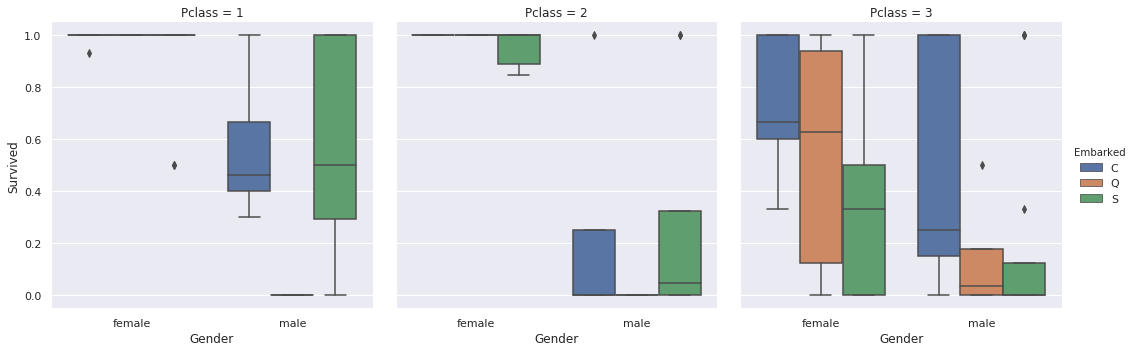

In [6]:
ax = sns.catplot(data=means_df, x="Gender", y="Survived", col="Pclass", hue="Embarked", kind="box")

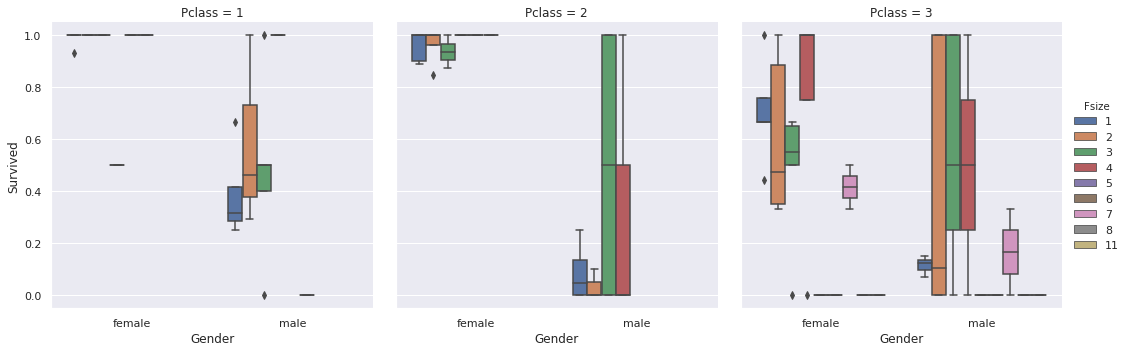

In [7]:
ax = sns.catplot(data=means_df, x="Gender", y="Survived", col="Pclass", hue="Fsize", kind="box")

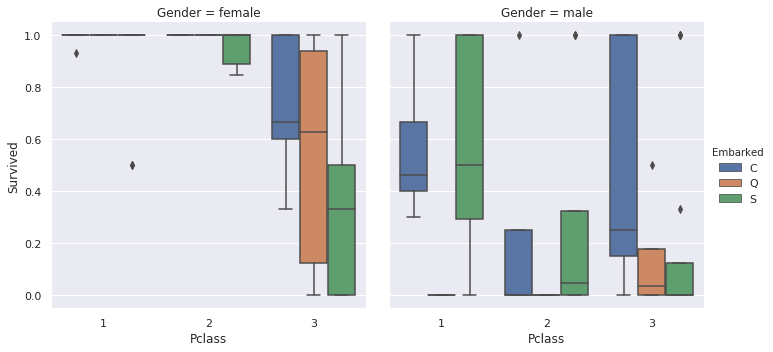

In [8]:
ax = sns.catplot(data=means_df, x="Pclass", y="Survived", col="Gender", hue="Embarked", kind="box")

Observations:

* Females of class 1 or 2 did well, even better if they embarked at port C.
* Males experienced lower survival rates than females regardless of class.
* Ports C, Q, and S, in that order, have decreasing survival rates regardless of class.

Let's use the `Title` now to drive the visualization.

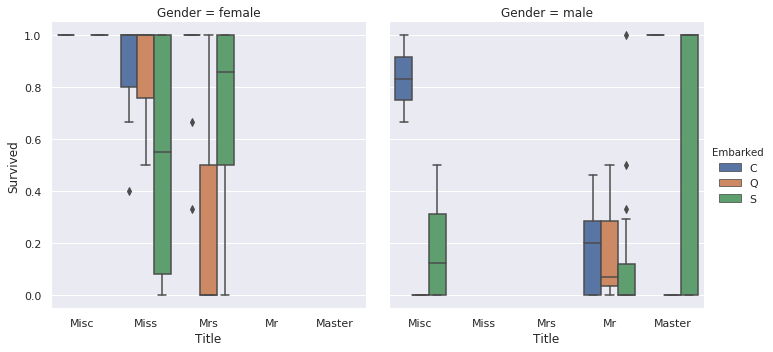

In [9]:
ax = sns.catplot(data=means_df, x="Title", y="Survived", col="Gender", hue="Embarked", kind="box")

Observations:

* Older woman (Mrs) did slightly better than younger ones (Miss) if embarked at port C. It was the opposite if they embarked at port S, and did fairly well if they embarked at por Q.
* Males with the _Master_ title did surprisingly well when compared to those with title _Mr_. We know already that the formers are children of young ages.

Let's drop the `Title` now and put `Pclass` and `Embarked` together in the visualization.

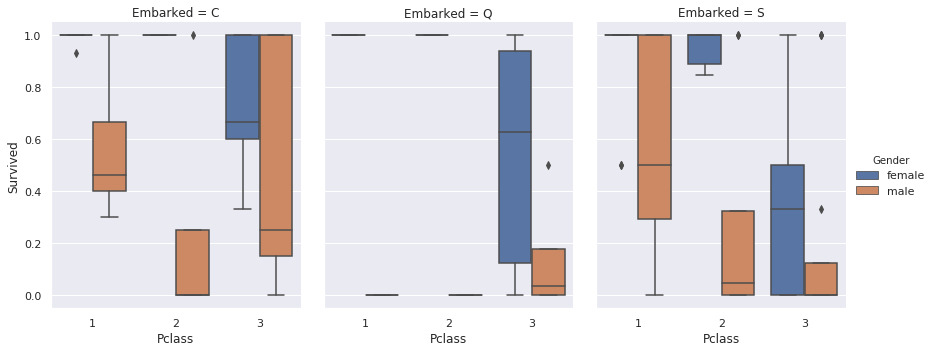

In [10]:
ax = sns.catplot(data=means_df, x="Pclass", y="Survived", hue="Gender", col="Embarked", aspect=.8, kind='box')

Observations:

* The most favorable port for males is port C. Ports C and Q are the most favorables for females.
* Class 3 is consistently worse for females reagardless of port. It is equally bad for males on ports Q and S. Surprisingly, the class does not seem to have much value for male survival rate at port C.

Let's take a look now at the family size.

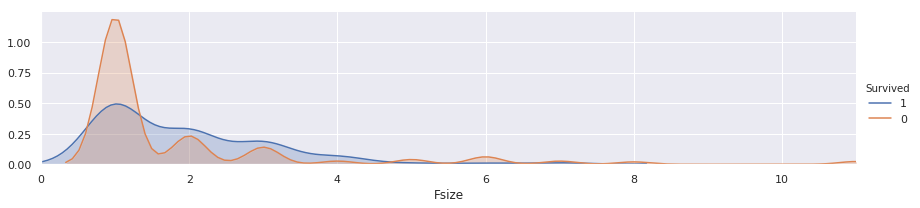

In [32]:
facet = sns.FacetGrid(train_df, hue='Survived', hue_order=[1,0], aspect=4)
facet.map(sns.kdeplot, 'Fsize', shade=True)
facet.set(xlim=(0, train_df.Fsize.max()))
facet.add_legend()
plt.show()

It is clear from the chart above that those travelling alone fared better than those in large families. However these loners did much worse than those in small families of up to 4 members. The survival rate is basically zero for family sizes of 5 or greater. In summary, being part of a small family was the most positive factor for survival from the point of view of family size.

### <a name="categortical-features-heat-map"></a>Categortical Features Heat Map

As a final exploration exercise, let's draw a heat map for the categorical features.

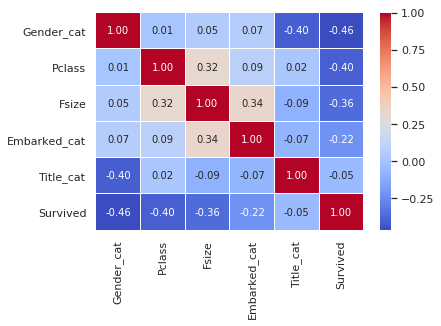

In [12]:
features = ['Gender_cat', 'Pclass', 'Fsize', 'Embarked_cat', 'Title_cat', 'Survived']
ax = sns.heatmap(means_df[features].corr(), cmap="coolwarm",
                 annot=True, fmt='.2f', linewidths=.05)

Darker tones indicate a stronger correlation. Reading the column at the far right, the map tells us that _Gender_, _Class_, _Family size_, _Port_, and _Title_ are decreasingly correlated in that order with the survival rate. The passenger's title however shows very little correlation with survival, but it played a pivotal role in helping us to fix the age entries. The heat map is probably correct, as who cared about titles in the middle of this tragedy?

## <a name="numerical-features"></a>Exploring The Numerical Features

Let's explore the age and fare numerical features. The first step is to take a look at their distributions.

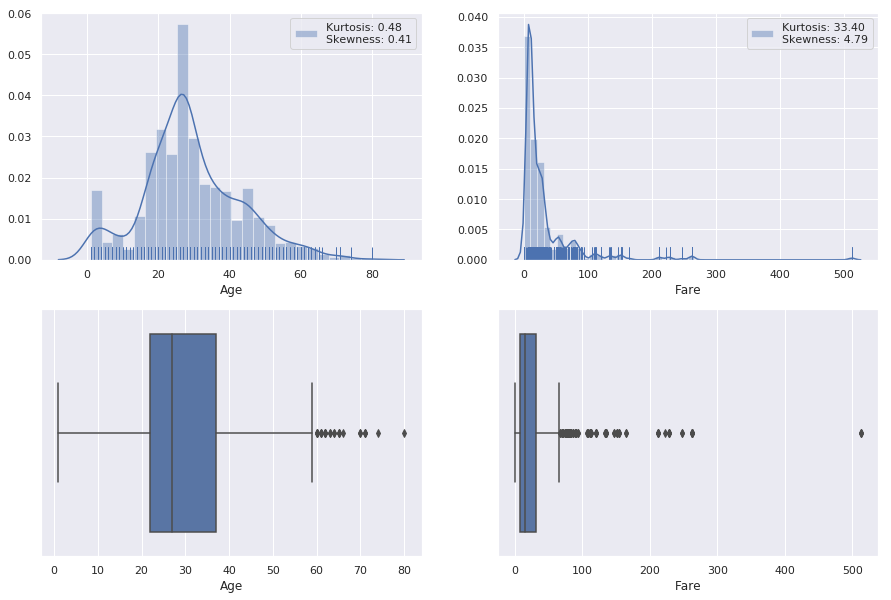

In [13]:
_, ax = plt.subplots(2, 2, figsize=(15,10))
age_ax = sns.distplot(train_df.Age, rug=True, ax=ax[0][0],
                      label="Kurtosis: {:.2f}\nSkewness: {:.2f}".format(train_df.Age.kurt(), train_df.Age.skew()))
fare_ax = sns.distplot(train_df.Fare, rug=True, ax=ax[0][1],
                       label="Kurtosis: {:.2f}\nSkewness: {:.2f}".format(train_df.Fare.kurt(), train_df.Fare.skew()))
fare_box_ax = sns.boxplot(x=train_df.Age, ax=ax[1][0])
age_box_ax = sns.boxplot(x=train_df.Fare, ax=ax[1][1])
age_ax.legend(loc="best")
fare_ax.legend(loc="best")
plt.show()

The age distibution is fine; the box plot displays a few outliers but the overall distibution retains reasonable Kurtosis and Skewness values (for reference, these values as calculated by the seaborn package are zero for the normal distribution). The fare distribution on the contrary needs work; it is heavily skewed to the right and there are extreme outliers as indicated by the high Kurtosis and the box diagram.

### <a name="the-age-factor"></a>The Age Factor

Let's keep the age column as is and explore the associated survival rate.

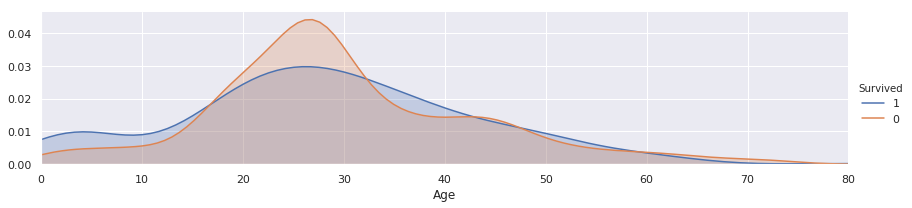

In [14]:
facet = sns.FacetGrid(train_df, hue='Survived', hue_order=[1,0], aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df.Age.max()))
facet.add_legend()
plt.show()

The survival rate is better (positive) for the age ranges 0-15, 35-40, and around 50. Those passengers in the 20-35 age range did not fare well. Let's see how the gender affects these observations.

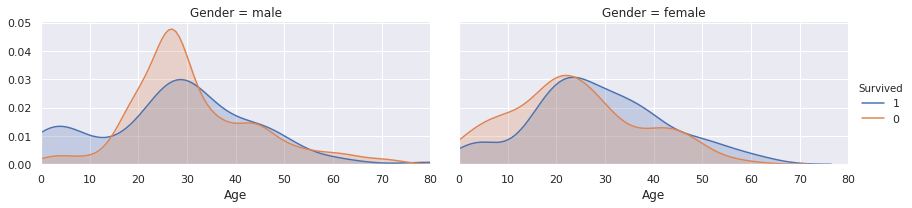

In [15]:
facet = sns.FacetGrid(train_df, hue='Survived', hue_order=[1,0], col='Gender', aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df.Age.max()))
facet.add_legend()
plt.show()

The picture is clearer now. The survival rates for ages in the 0-15 range comes mostly form males while that for the 35-40 and around 50 ranges comes from females.

Fianlly, let's bring the priotity class into the survival-by-age picture.

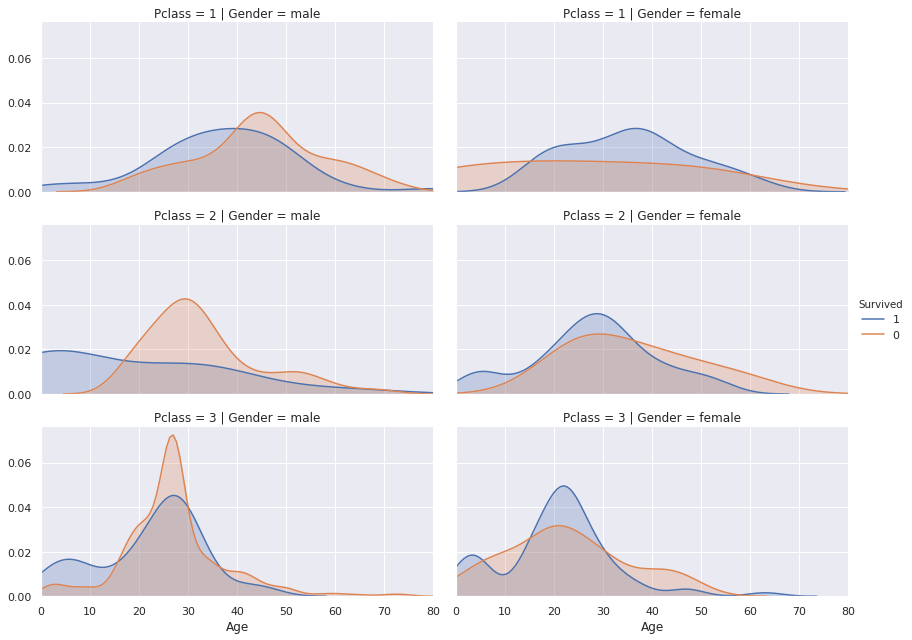

In [16]:
facet = sns.FacetGrid(train_df, hue='Survived', hue_order=[1,0], col='Gender', row='Pclass', height=3, aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df.Age.max()))
facet.add_legend()
plt.show()

Most of the young males 0-15 who survived come from classes 2 and 3, but most of the older men who survived come from class 1. A similar statement can be said about young females 0-10, as those who survived come from classes 2 and 3. Females 10-30 of all classes fared similarly, but older ones did well only if they were of class 1.

### <a name="age-groups"></a>Age Groups

The passengers' age data can be grouped into bins of some size, say, 10 years. This process of binning facilitates the encoding of the age feature while still retaining the relevant information about survival. Let's look at the survival rate through the eyes of eight bins spaced every 10 years, from age 0 to age 80.

In [17]:
train_df['Age_group'] = pd.cut(train_df['Age'],
                               bins=np.linspace(0,80,8),
                               labels=['10','20','30','40','50','60','70'])
train_df['Age_group'].value_counts(sort=False)

10     79
20    189
30    355
40    160
50     75
60     26
70      7
Name: Age_group, dtype: int64

The binning process is telling us that there are 79 passengers in the training set between the ages of 0 and 10, 189 passengers between 10 and 20, and so on. Let's plot the survival rate per age group now.

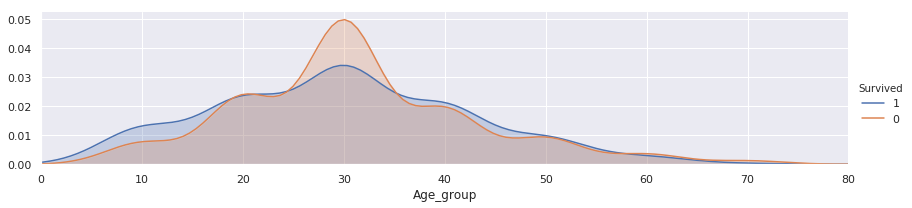

In [18]:
facet = sns.FacetGrid(train_df, hue='Survived', hue_order=[1,0], aspect=4)
facet.map(sns.kdeplot, 'Age_group', shade=True)
facet.set(xlim=(0, train_df.Age.max()), xticks=[0, 10, 20, 30, 40, 50, 60, 70, 80])
facet.add_legend()
plt.show()

As before, the survival rates are better for the 0-20 and 35-50 age ranges, and worse for the 20-35 age range.

Before moving to the next section, let's create the _Age-group_ column on the combined dataset as well.

In [19]:
combined_df['Age_group'] = pd.cut(combined_df['Age'],
                                  bins=np.linspace(0,80,8),
                                  labels=['10','20','30','40','50','60','70'])

### <a name="the-ticket-fare"></a>The Ticket Fare

As shown above, the ticket fare data has several outliers that skew its distribution. Let's use a log transform on the data and re-evaluate the new series.

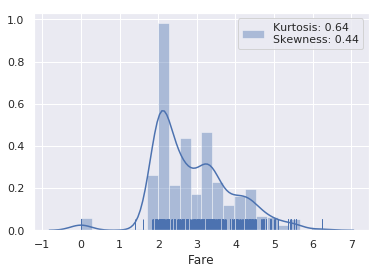

In [20]:
fare_log = train_df.Fare.map(lambda x: np.log(x) if x > 0 else 0)
fare_log_ax = sns.distplot(fare_log, rug=True, label="Kurtosis: {:.2f}\nSkewness: {:.2f}".format(fare_log.kurt(), fare_log.skew()))
fare_log_ax.legend(loc="best")

Kurtosis and skewness values are reasonable now. I will use the log-transformed series then in the following analysis.

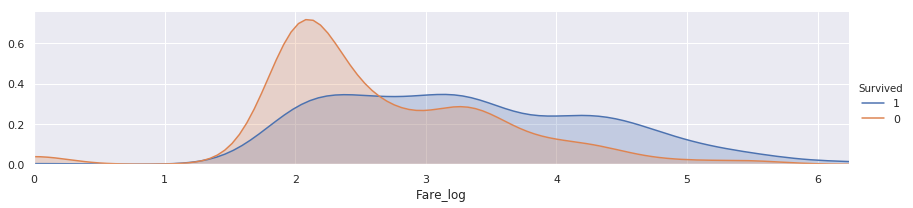

In [21]:
train_df['Fare_log'] = fare_log
facet = sns.FacetGrid(train_df, hue='Survived', hue_order=[1,0], aspect=4)
facet.map(sns.kdeplot, 'Fare_log', shade=True)
facet.set(xlim=(0, train_df.Fare_log.max()))
facet.add_legend()
plt.show()

From the above diagram it is clear that survival rate is better for those who payed a higher fare. Mostly all of those who got a free ride on the Titanic (fare of zero) perished.

Is the fare adding much to the prediction of the survival rate? We already saw that the priority class is highly correlated to the survival rate, and because the fare goes hand-by-hand with the priority class, we might just be readng the same information. Let's plot the fare and priority class together.

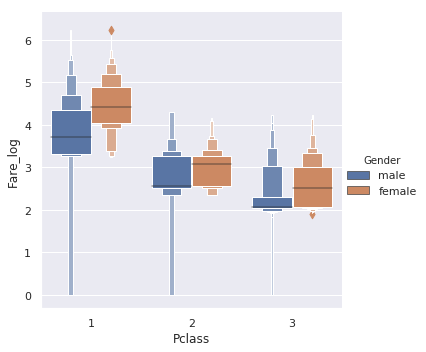

In [22]:
g = sns.catplot(x="Pclass", y="Fare_log", hue="Gender", kind='boxen', data=train_df)

As expected, fare and class are highly correlated. Basically, saying that _first class passengers fared better_ or that _higher-fare ticket holders fared better_ are equivalent statements.

Before moving to the next section, let's add a _Fare-log_ column to the combined dataset as well.

In [23]:
combined_df['Fare_log'] = combined_df.Fare.map(lambda x: np.log(x) if x > 0 else 0)

### <a name="age-and-fare"></a>Age and Fare Together

Just for curiosity, as there is no consideration of the survival rate, let's look at the ticket fare the passengers payed when grouping passengers into _young_, _middle_, and _senior_ groups, according to their age in the combined dataset.

In [24]:
combined_df['AgeCat'] = pd.cut(combined_df['Age'], 3, labels=['young', 'middle', 'seniors'])
combined_df['AgeCat'].value_counts()

young      701
middle     531
seniors     77
Name: AgeCat, dtype: int64

Let's draw a graphic illustrating the ticket fare for each of the above three age groups.

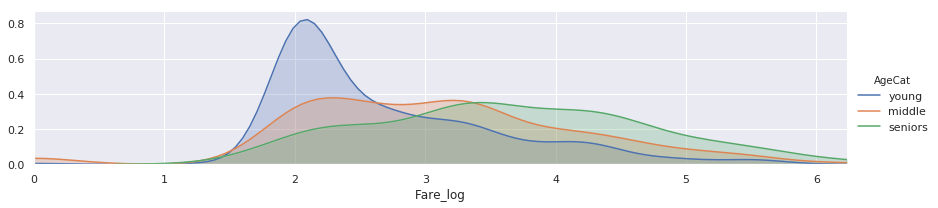

In [25]:
facet = sns.FacetGrid(combined_df, hue='AgeCat', aspect=4)
facet.map(sns.kdeplot, 'Fare_log', shade=True)
facet.set(xlim=(0, combined_df.Fare_log.max()))
facet.add_legend()
plt.show()

The graphic is pretty compelling. Younger passengers payed lower fares, and the fares increased for increasingly older passengers. The rationale could be that older passengers are welthier in general and therefore can more easily afford to pay premium prices.

The _Fare-log_ column is a continuous variable that I want to discretize and turn into bins without loosing the information it provides. This transformation makes the data easier to use when we feed it to the data models.

The following code uses the _qcut_ Pandas function to create the _Fare-cat_ column with approximately eight equal-size buckets.

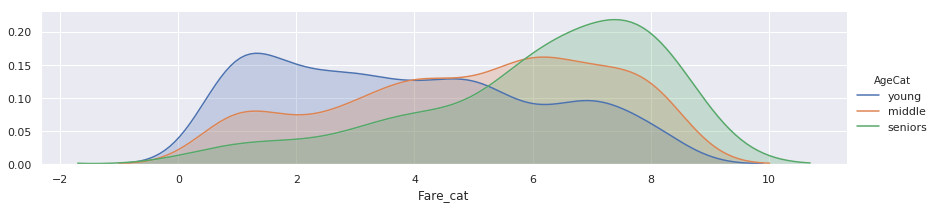

In [26]:
combined_df['Fare_cat'] = pd.qcut(combined_df['Fare_log'], 8, labels=['1','2','3','4','5','6','7','8'])
facet = sns.FacetGrid(combined_df, hue='AgeCat', aspect=4)
facet.map(sns.kdeplot, 'Fare_cat', shade=True)
facet.add_legend()
plt.show()

The core information remains there, as we still can identify young and seniors as purchasing less and more expensive tickets respectively. We can now remove the `AgeCat` column that we used only temporarily.

In [27]:
combined_df.drop(['AgeCat'], axis=1, inplace=True)

## <a name="feature-clean-up"></a>Feature Clean Up

Let's review the state of the combined dataset after all the processing we have done up to this point.

In [28]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (train, 1) to (test, 1309)
Data columns (total 16 columns):
Pclass          1309 non-null int64
Name            1309 non-null object
Gender          1309 non-null object
Age             1309 non-null int64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Fare            1309 non-null float64
Embarked        1309 non-null object
Fsize           1309 non-null int64
Title           1309 non-null object
Gender_cat      1309 non-null int64
Embarked_cat    1309 non-null int64
Title_cat       1309 non-null int64
Age_group       1309 non-null category
Fare_log        1309 non-null float64
Fare_cat        1309 non-null category
dtypes: category(2), float64(2), int64(8), object(4)
memory usage: 160.7+ KB


We can drop several columns now:

* Drop the _Name_ column which is no longer needed.
* Drop the _Gender_ column because it is encoded in the _Gender-cat_ column already.
* Drop the _Age_ column because we want to use the _Age-group_ column instead.
* Drop the _Fare_ column because we want to use the _Fare-Log_ column instead.
* Drop the _Embarked_ comlumn because it is encoded in the _Embarked-cat_ column already.
* Drop the _Title_ comlumn because it is encoded in the _Title-cat_ column already.
* Drop the _Fare-log_ comlumn because it is encoded in the _Fare-cat_ column already.

In [29]:
combined_df.drop(['Name', 'Gender', 'Age', 'Fare', 'Embarked', 'Title', 'Fare_log'], axis=1, inplace=True)
combined_df

Pclass  SibSp  Parch  Fsize  Gender_cat  Embarked_cat  Title_cat  \
type  id                                                                       
train 1          3      1      0      2           1             2          3   
      2          1      1      0      2           0             0          4   
      3          3      0      0      1           0             2          2   
      4          1      1      0      2           0             2          4   
      5          3      0      0      1           1             2          3   
...            ...    ...    ...    ...         ...           ...        ...   
test  1305       3      0      0      1           1             2          3   
      1306       1      0      0      1           0             0          4   
      1307       3      0      0      1           1             2          3   
      1308       3      0      0      1           1             2          3   
      1309       3      1      1      3           1             0          0   

           Age_group Fare_cat  
type  id                       
train 1           20        1  
      2           40        8  
      3           30        3  
      4           40        7  
      5           40        3  
...              ...      ...  
test  1305        30        3  
      1306        40        8  
      1307        40        1  
      1308        30        3  
      1309        10        5  

[1309 rows x 9 columns]

## <a name="saving-the-data"></a>Saving the Data

We can save the updated datasets now.

In [30]:
train_clean_df = combined_df.loc['train'].copy()
train_clean_df['Survived'] = train_df.Survived
train_clean_df

Pclass  SibSp  Parch  Fsize  Gender_cat  Embarked_cat  Title_cat  \
id                                                                      
1         3      1      0      2           1             2          3   
2         1      1      0      2           0             0          4   
3         3      0      0      1           0             2          2   
4         1      1      0      2           0             2          4   
5         3      0      0      1           1             2          3   
..      ...    ...    ...    ...         ...           ...        ...   
887       2      0      0      1           1             2          1   
888       1      0      0      1           0             2          2   
889       3      1      2      4           0             2          2   
890       1      0      0      1           1             0          3   
891       3      0      0      1           1             1          3   

    Age_group Fare_cat  Survived  
id                                
1          20        1         0  
2          40        8         1  
3          30        3         1  
4          40        7         1  
5          40        3         0  
..        ...      ...       ...  
887        30        4         0  
888        20        6         1  
889        10        5         0  
890        30        6         1  
891        30        1         0  

[891 rows x 10 columns]

In [31]:
combined_df.to_csv('data/combined-2.csv')
train_clean_df.to_csv('data/train-2.csv')
combined_df.loc['test'].to_csv('data/test-2.csv')